In [11]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [12]:
data=pd.read_excel("learn_data2.xlsx")

In [13]:
data

,Time,Signal_run0,Signal_run1,Signal_run2
0,0.000000,0.041669,0.088002,0.163125
1,0.888889,0.255198,0.545039,1.030604
2,1.777778,0.418778,0.941498,1.600735
3,2.666667,0.701116,1.421870,2.571093
4,3.555556,0.867114,2.055669,3.217268
5,4.444444,0.998305,2.485980,3.861858
6,5.333333,1.173103,2.685220,5.396758
7,6.222222,1.477790,3.125596,6.141928
8,7.111111,1.608943,3.455539,6.071573
9,8.000000,1.760148,3.812330,8.191490


In [4]:
Additiv=0.2, 0.45, 0.8

In [108]:
#definieren der Funktion
def model(x,args):

    k,d,factor= args[0]
    
    if len(args) > 1:
        add=args[1]
    
    y=(k*x+d)*factor*add
    
    return y

In [123]:
#definieren der Initialwerte für die Parametrisierung
ini_par=1,1,1

In [132]:
#Aufstellen einer funktion zu berechnung des Errors der minimiert werden soll
def function(ini_par,datax,datay,Additiv):
                       
    error_all=[]
    for i in range(datay.shape[1]):
        args=ini_par,Additiv[i]         #umbennwnwn der initial variablen und hinzufügen des endsprechenden Additivs
        sim=model(datax,args) 
        #sim=model(datax,args)           #berechnung der simulierten werte
        error=(sim-datay.iloc[:,i])**2            #subtrahieren der simulirten werte von den gemessenen Werte
        error_sum=np.sum(error)         #Bildung der Summe des Errors
        error_all.append(error_sum)
    error_all_sum=np.sum(error_all)
    return error_all_sum

In [134]:
result=minimize(function,ini_par, args=(data["Time"],data.iloc[:,1:],Additiv), method='SLSQP')

In [135]:
result

     fun: 1.6192888130139973
     jac: array([ 1.51577592e-03, -2.81929970e-05,  2.14539468e-03])
 message: 'Optimization terminated successfully'
    nfev: 37
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([1.27694132, 0.14093497, 0.90102108])

In [136]:
#abspeichern der optimierten modelparametern
opt_value=result.x

In [137]:
#erstellen einer simulierten zeit
sim_time=np.linspace(0,8,1000)

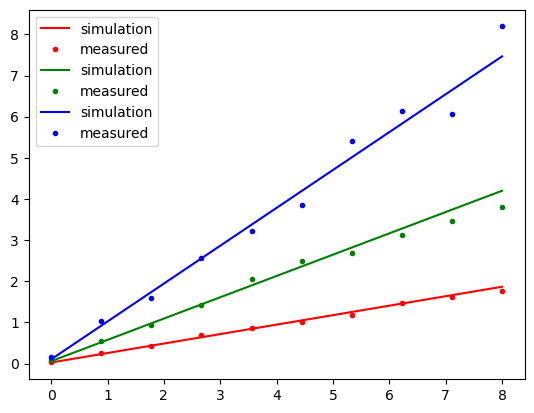

In [149]:
#grafische darstellung der daten
colour="red","green","blue"
for i in range(data.iloc[:,1:].shape[1]):
    args=opt_value,Additiv[i]
    sim=model(sim_time,args)
    plt.plot(sim_time,sim,"-",label="simulation",color=colour[i])
    plt.plot(data["Time"],data.iloc[:,1+i],".",label="measured",color=colour[i])
    plt.legend()

1